In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)

n = 1000

departments = ['IT', 'HR', 'Finance', 'Sales', 'Marketing', 'Operations']

data = {
    'Employee_ID': range(1, n + 1),
    'Age': np.random.randint(22, 60, n),
    'Department': np.random.choice(departments, n),
    'Years_Experience': np.random.randint(0, 35, n),
    'Training_Hours': np.random.randint(5, 120, n),
    'Work_Life_Balance': np.random.randint(1, 6, n)
}

df = pd.DataFrame(data)

# Salary depends on experience + department factor
dept_salary_factor = {
    'IT': 1.3,
    'Finance': 1.4,
    'Sales': 1.2,
    'Marketing': 1.1,
    'HR': 1.0,
    'Operations': 1.05
}

df['Salary'] = (
    30000 +
    df['Years_Experience'] * 2500 +
    df['Department'].map(dept_salary_factor) * 10000 +
    np.random.normal(0, 5000, n)
).astype(int)

# Performance score depends on experience + training
df['Performance_Score'] = (
    50 +
    df['Years_Experience'] * 0.8 +
    df['Training_Hours'] * 0.15 +
    np.random.normal(0, 5, n)
).clip(40, 100)

df.head()


,Employee_ID,Age,Department,Years_Experience,Training_Hours,Work_Life_Balance,Salary,Performance_Score
0,1,50,Operations,20,110,2,91964,83.207754
1,2,36,Marketing,22,55,1,97888,63.734768
2,3,29,IT,15,54,2,82462,72.244602
3,4,42,Marketing,14,10,5,83952,65.754488
4,5,40,Marketing,24,63,4,98701,76.891874


In [2]:
df.shape

(1000, 8)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


Employee Distribution per Department

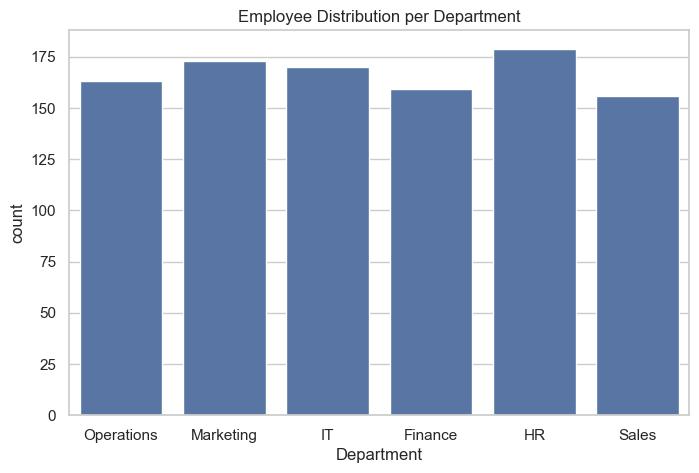

In [4]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Department')
plt.title("Employee Distribution per Department")
plt.show()


Average Salary per Department

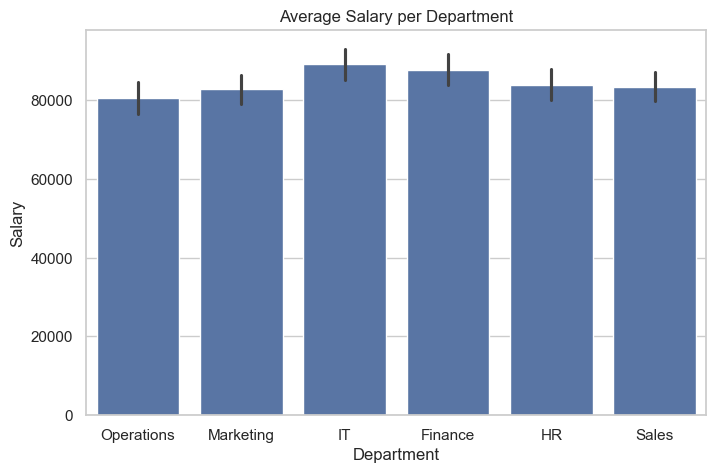

In [5]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Department', y='Salary', estimator=np.mean)
plt.title("Average Salary per Department")
plt.show()


Learning Investment by Department (Training Hours)

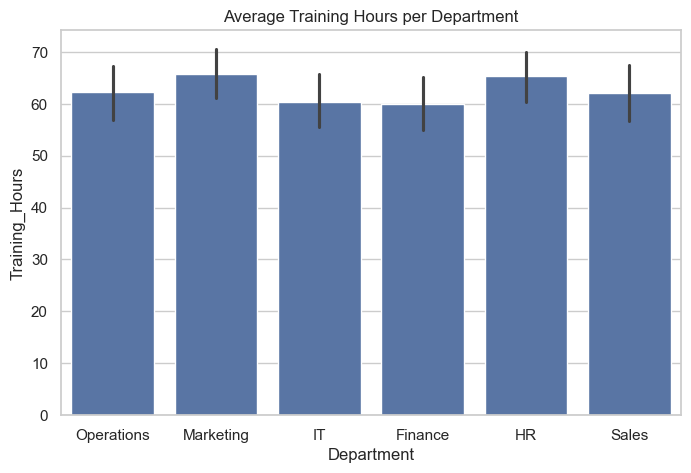

In [6]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Department', y='Training_Hours', estimator=np.mean)
plt.title("Average Training Hours per Department")
plt.show()


Relationship Between Training and Performance

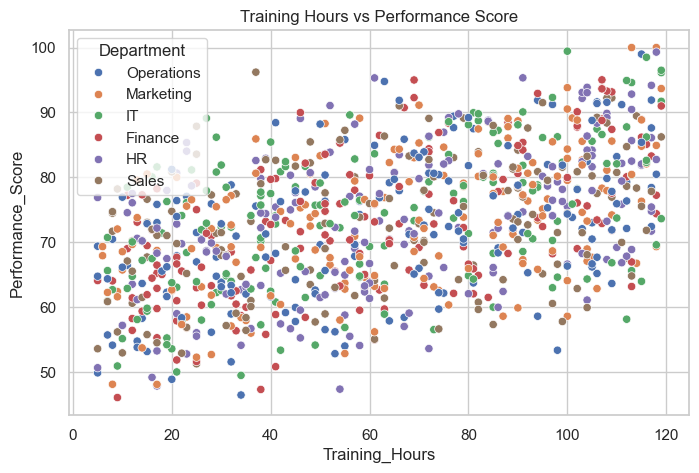

In [7]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Training_Hours', y='Performance_Score', hue='Department')
plt.title("Training Hours vs Performance Score")
plt.show()


Department-wise Work-Life Balance (WLB)

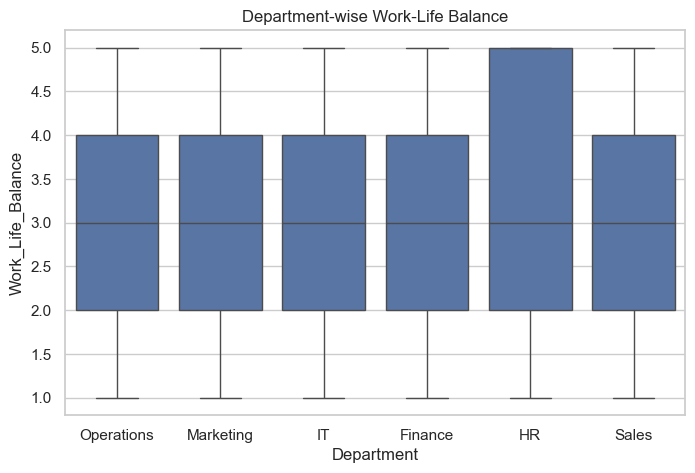

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Department', y='Work_Life_Balance')
plt.title("Department-wise Work-Life Balance")
plt.show()
